# $Part1 -- Que3$.


### Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute. Here’s the [dataset](https://drive.google.com/file/d/1yuDyU7EjJ8Nai83FDdIF2w4inm17NzBF/view). 

### $Suggested Questions:$
1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example using a keyword in the first 10 words - have any co-relation with the ranking)?
2. Does APP ID (Also known as package name) play any role in ranking?  
3. Any other pattern or good questions that you can think of and answer?

## $Import Required Libraries :$

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Self written module
from preprocessor import DataPreprocessing
from preprocessor import DisplayCorrelation

## $Load Data :$

In [2]:
df = pd.read_csv('data/browser_rankings_data.csv', skiprows=1)
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


## $Data Preprocessing:$

In [3]:
# from preprocessor import DataPreprocessing
DataPreprocessing = DataPreprocessing()  # initialize 

In [4]:
DataPreprocessing.basic_info(df)

Shape of the dataset:  (3066, 10)

Columns present: Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description           

- It seems **$Column - Rank$** have missing values.
- **$Columns - Date$ & $Date of Last Description Change$** are showing as object, however these are date-time.

In [5]:
# convert date-time
df = DataPreprocessing.convert_date_time(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3066 non-null   int64         
 1   Keyword                          3066 non-null   object        
 2   Rank                             3050 non-null   float64       
 3   Country                          3066 non-null   object        
 4   Language                         3066 non-null   object        
 5   Date                             3066 non-null   datetime64[ns]
 6   App ID                           3066 non-null   object        
 7   Date of Last Description Change  3066 non-null   datetime64[ns]
 8   Short Description                3066 non-null   object        
 9   Long Description                 3066 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory

In [6]:
# check missing values present
DataPreprocessing.is_null_present(df)

                           columns  missing values count
0                               ID                     0
1                          Keyword                     0
2                             Rank                    16
3                          Country                     0
4                         Language                     0
5                             Date                     0
6                           App ID                     0
7  Date of Last Description Change                     0
8                Short Description                     0
9                 Long Description                     0


True

In [7]:
# impute_missing_values using KNNImputer

# from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', missing_values=np.nan)
df['Rank'] = imputer.fit_transform(df[['Rank']])

In [8]:
# Confirming missing values filled
DataPreprocessing.is_null_present(df)

False

In [9]:
# check number of unique values present 
DataPreprocessing.cat_feature_unique_values(df)

Unique values for categorical features --
Keyword : 7
Country : 1
Language : 1
App ID : 8
Short Description : 9
Long Description : 13


- It seems **$Column - Country$ & $Language$** have only one unique value i.e. constant values (std. dev. = 0)

In [10]:
# Converting categorical to numeric
df = DataPreprocessing.label_encoder(df)
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2.0,0,0,2020-12-16,7,2020-12-18,8,2
1,2,3,3.0,0,0,2020-12-16,0,2020-12-18,3,1
2,3,3,4.0,0,0,2020-12-16,4,2021-02-27,2,0
3,3,3,4.0,0,0,2020-12-16,4,2020-12-18,2,3
4,4,3,1.0,0,0,2020-12-16,2,2021-02-07,6,9


In [11]:
df.describe()

,ID,Keyword,Rank,Country,Language,App ID,Short Description,Long Description
count,3066.000000,3066.000000,3066.000000,3066.0,3066.0,3066.000000,3066.00000,3066.000000
mean,57109.156230,2.844749,15.155738,0.0,0.0,3.312459,3.23940,6.853229
std,39290.651658,1.914834,24.204977,0.0,0.0,1.868662,2.64965,3.758968
min,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.00000,0.000000
25%,22484.000000,1.000000,2.000000,0.0,0.0,2.000000,1.00000,4.000000
50%,52427.000000,3.000000,5.000000,0.0,0.0,3.000000,3.00000,7.000000
75%,90683.750000,4.000000,15.155738,0.0,0.0,5.000000,5.00000,10.000000
max,131576.000000,6.000000,134.000000,0.0,0.0,7.000000,8.00000,12.000000


In [12]:
# drop columns with zero std. dev. i.e. Country & Language
df = df.drop(columns=['Country', 'Language'], axis=1)
df.head()

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2.0,2020-12-16,7,2020-12-18,8,2
1,2,3,3.0,2020-12-16,0,2020-12-18,3,1
2,3,3,4.0,2020-12-16,4,2021-02-27,2,0
3,3,3,4.0,2020-12-16,4,2020-12-18,2,3
4,4,3,1.0,2020-12-16,2,2021-02-07,6,9


### Now data is clean  for further use.

# $Understanding$ $Correlation :$

In [13]:
# Correlation used in feature selection

# Pearson Correlation -- shows strength & direction of relationship; range : -1 to +1
# Pearson’s correlation is just the covariance divided by the product of the standard deviations.

# Spearman's rank correlation coefficient -- works well with non linear data & outliers as well.
# Spearman’s rho is just the Pearson correlation applied to the ranks.

### The Spearman Rank Correlation can take a value from +1 to -1 where,

- A value of +1 means a perfect association of rank
- A value of 0 means that there is no association between ranks
- A value of -1 means a perfect negative association of rank


- Monotonically Increasing: As the variable X increases, the variable Y never decreases.
- Monotonically Decreasing: As the variable X increases, the variable Y never increases.
- Not Monotonic: As the X variable increases, the Y variable sometimes decreases and sometimes increases. 

## $Checking$ $Correlation :$

In [14]:
# from preprocessor import DisplayCorrelation
DisplayCorrelation = DisplayCorrelation()   

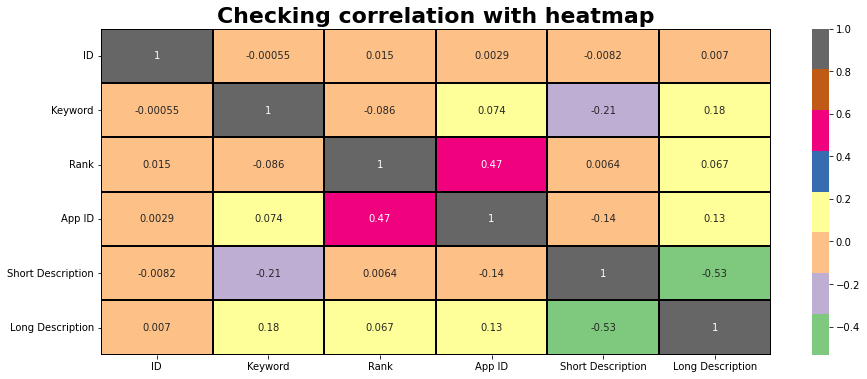

In [15]:
DisplayCorrelation.corr_heatmap(df)

## $Observations :$

- ID do not have a significant monotonically correlation with any of the feature.
- Keyword is most negatively correlated with Short Description, with APP ID & Long Description somewhat positively correlated.
- Rank is most positively correlated with App ID among all the features, somewhat positively correlated with Short Description & no significant monotonically correlated with any of the other feature.
- Short Description & Long Descriptions are the most negatively correlated with each other & among all too, Also Short Description is somewhat negatively correlated with Keyword.
- Long Description do not have a significant monotonically correlation with ID & somewhat positively correlated with Keyword, Rank, App ID as compared to ID.

## $Suggested Questions:$

### 1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example using a keyword in the first 10 words - have any co-relation with the ranking)?

- Short Description & Long Descriptions are the most negetively correlated with each other.
- Short Description do not have a significant monotonically correlation with Rank.
- Rank & Keyword are weak monotoncally negatively correlated, using a keyword in the first 10 words would not have a significantly major monotonically correlation with Rank, however it will impact somewhat negatively correlated.

### 2. Does App ID (Also known as package name) play any role in ranking?  

- Rank is most positivelty correlated with App ID among all the features, these are significantly positivey corrrelated with each other and change in one will significantly change other i.e. increment in App ID will increase Rank.

### 3. Any other pattern or good questions that you can think of and answer?

- What are the most negatively correlated features??
  - Short Description & Long Descriptions.
  - These are the most negatively correlated features, this may be becuase of these are sentiment based.

-----------------------------------------------------------------------------------------------------------------